In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pickle

from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [49]:
def get_file_list(directory):
  file_list = os.listdir(directory)
  all_files = []
  for entry in file_list:
    path = os.path.join(directory, entry)
    if os.path.isdir(path):
      all_files = all_files + get_file_list(path)
    else:
      all_files.append(path)
  return all_files

def get_model_specs(model_name):
  return model_name.split('_')


def save_accuracy_plot(filepath):
  with open(filepath, 'rb') as read_file:
    history = pickle.load(read_file)
    print(history.history['val_loss'])

    train_accuracy = history.history['accuracy']
    test_accuracy = history.history['val_accuracy']
    epochs = [epoch for epoch in range(1, len(train_accuracy) + 1)]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    [_, hidden_layers, optimizer, loss, activation, batch_size, _] = get_model_specs(filepath.split('/')[-1].split('.')[0])
    title = f'HL: {hidden_layers} - OPT: {optimizer} - L: CE - ACT_FN: {activation} - BATCH: {batch_size}'
    fig.suptitle(title)

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Test Accuracy')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(alpha=0.2)
    plt.ylim([0, 1])

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Test Loss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(alpha=0.2)
    plt.ylim([0, np.max(history.history['val_loss'])])

    plt.savefig('/gdrive/My Drive/Kaggle/Plots/Accuracies/' + title + ".png")


def initialize_dataFrame_dict():
  model_spec_keys = [
    'model name',
    'hidden layer',
    'optimizer',
    'loss',
    'activation function',
    'batch size',
  ]
  accuracy_keys_train = [f'accuracy train epoch {epoch}' for epoch in range(1, 11)]
  accuracy_keys_test = [f'accuracy test epoch {epoch}' for epoch in range(1, 11)]
  loss_keys_train = [f'loss train epoch {epoch}' for epoch in range(1, 11)]
  loss_keys_train = [f'loss train epoch {epoch}' for epoch in range(1, 11)]

  accuracy_keys_test = [f'accuracy test epoch {epoch}' for epoch in range(1, 11)]
  accuracy_keys_test = [f'accuracy test epoch {epoch}' for epoch in range(1, 11)]
  loss_keys_test = [f'loss test epoch {epoch}' for epoch in range(1, 11)]
  loss_keys_test = [f'loss test epoch {epoch}' for epoch in range(1, 11)]

  keys = []
  for model_spec_key in model_spec_keys:
    keys.append(model_spec_key)

  for accuracy_key_train in accuracy_keys_train:
    keys.append(accuracy_key_train)
  keys.append('mean accuracy train')
  keys.append('max accuracy train')

  for accuracy_key_test in accuracy_keys_test:
    keys.append(accuracy_key_test)
  keys.append('mean accuracy test')
  keys.append('max accuracy test')

  for loss_key_train in loss_keys_train:
    keys.append(loss_key_train)
  keys.append('mean loss train')
  keys.append('min loss train')

  for loss_key_test in loss_keys_test:
    keys.append(loss_key_test)
  keys.append('mean loss test')
  keys.append('min loss test')

  return {key:[] for key in keys}

def create_report_df(filepath):
  pkl_files = get_file_list(filepath)
  data = initialize_dataFrame_dict()

  for index, pkl_file in enumerate(pkl_files):
    model_name = pkl_file.split('/')[-1].split('.')[0]
    print(f'{index}. {model_name}')
    [_, nof_hidden_layers, optimizer, loss, activation, batch_size, _] = get_model_specs(model_name)

    data['model name'].append(model_name)
    data['hidden layer'].append(nof_hidden_layers)
    data['optimizer'].append(optimizer)
    data['loss'].append(loss)
    data['activation function'].append(activation)
    data['batch size'].append(batch_size)

    with open(pkl_file, 'rb') as read_file:
      history = pickle.load(read_file)

      train_accuracy = history.history['accuracy']
      train_loss = history.history['loss']
      test_accuracy = history.history['val_accuracy']
      test_loss = history.history['val_loss']

      for index in range(len(train_accuracy)):
        data[f'accuracy train epoch {index + 1}'].append(train_accuracy[index])
        data[f'loss train epoch {index + 1}'].append(train_loss[index])
        data[f'accuracy test epoch {index + 1}'].append(test_accuracy[index])
        data[f'loss test epoch {index + 1}'].append(test_loss[index])

      data['mean accuracy train'].append(np.mean(train_accuracy))
      data['max accuracy train'].append(np.max(train_accuracy))
      data['mean accuracy test'].append(np.mean(test_accuracy))
      data['max accuracy test'].append(np.max(test_accuracy))
      data['mean loss train'].append(np.mean(train_loss))
      data['min loss train'].append(np.min(train_loss))
      data['mean loss test'].append(np.mean(test_loss))
      data['min loss test'].append(np.min(test_loss))

  return pd.DataFrame(data)




[1.3595653772354126, 1.2619425058364868, 1.2865151166915894, 1.1440554857254028, 1.2109804153442383, 1.2084898948669434, 1.115148663520813, 1.1629352569580078, 1.121363878250122, 1.107130527496338, 1.1765233278274536, 1.1454360485076904, 1.1486968994140625, 1.1515003442764282, 1.1656689643859863, 1.140705943107605, 1.1291838884353638, 1.240201711654663, 1.124903678894043, 1.202999234199524, 1.2331938743591309, 1.3924033641815186, 1.1663836240768433, 1.2141176462173462, 1.2695997953414917, 1.3020232915878296, 1.2132290601730347, 1.343018889427185, 1.4654734134674072, 1.444775104522705, 1.3014284372329712, 1.3461042642593384, 1.4177685976028442, 1.6290479898452759, 1.4617878198623657, 1.6466495990753174, 1.5280399322509766, 1.5617128610610962, 1.5295742750167847, 1.5759656429290771]


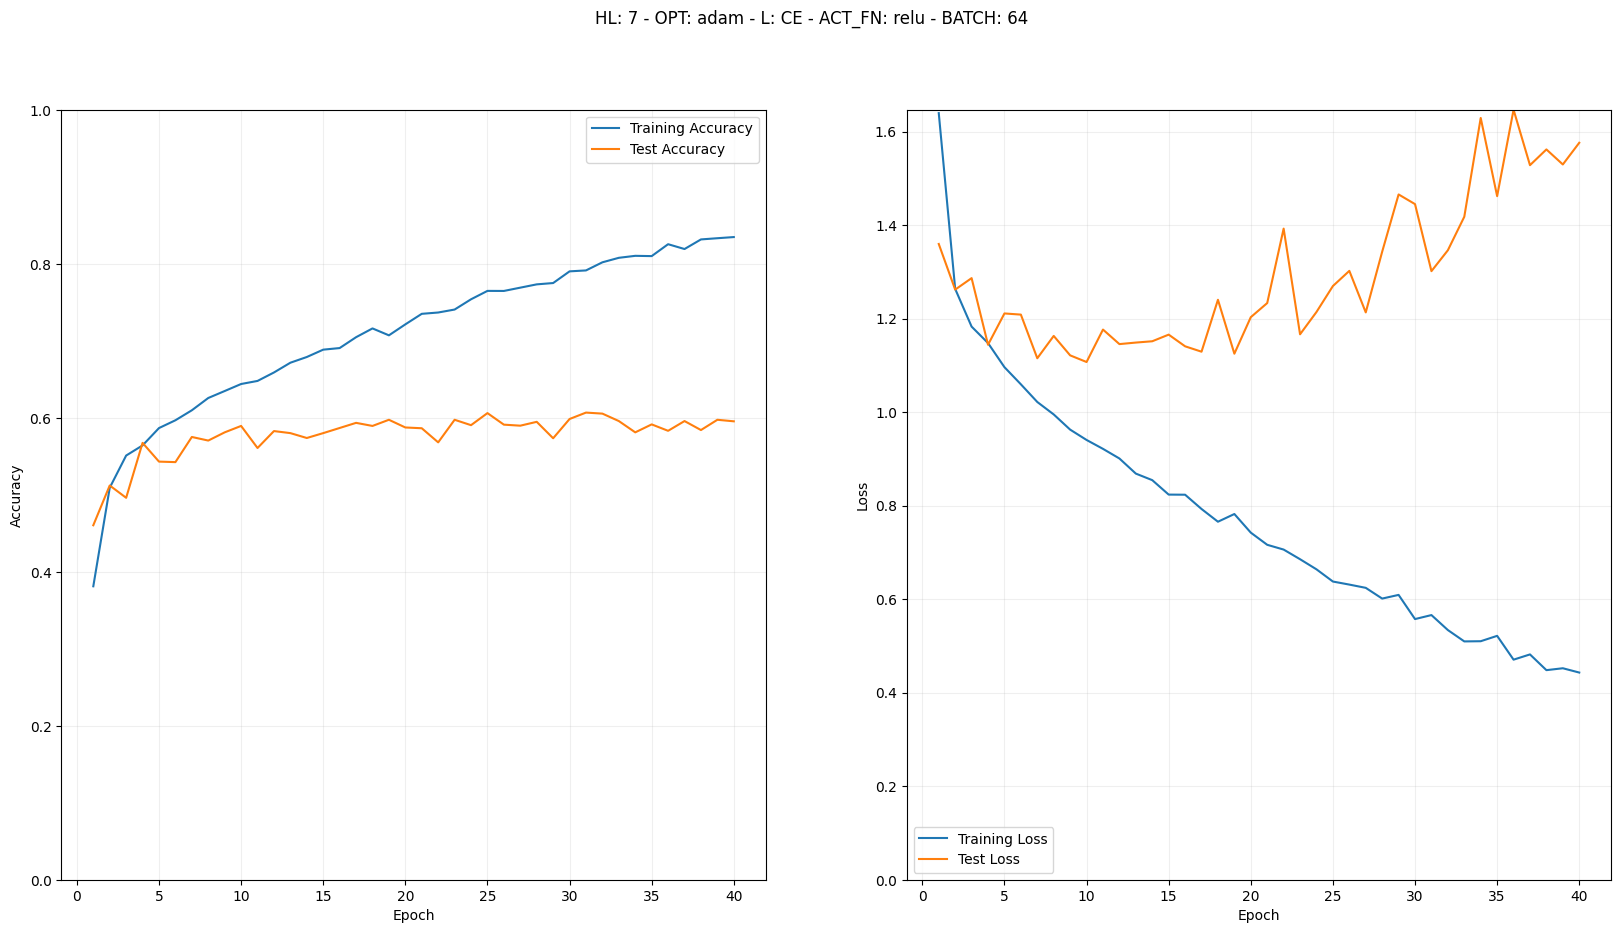

In [52]:
save_accuracy_plot ('/gdrive/My Drive/Kaggle/FinalModel_7_adam_SCCE_relu_64_history.pkl')

In [ ]:
# accuracy_hidden_layers = {
#     '3': [],
#     '7': [],
#     '10':[]
# }

# pkl_files = get_file_list('/gdrive/My Drive/Kaggle/')

# for pkl_file in pkl_files:
#   save_accuracy_plot(pkl_file)
# 3 adam sigmoid 128

report_df = create_report_df('/gdrive/My Drive/Kaggle/Pickles/')


report_df.to_csv('/gdrive/My Drive/Kaggle/report.csv', index=False)
report_df.head(20)

# save_accuracy_plot('/gdrive/My Drive/Kaggle/Model_7_sgd_SCCE_relu_256_history.pkl')

0. Model_3_sgd_SCCE_sigmoid_32_history
1. Model_3_sgd_SCCE_relu_64_history
2. Model_3_adam_SCCE_relu_128_history
3. Model_3_sgd_SCCE_relu_32_history
4. Model_3_adam_SCCE_sigmoid_256_history
5. Model_3_adam_SCCE_relu_256_history
6. Model_7_sgd_SCCE_sigmoid_32_history
7. Model_7_sgd_SCCE_relu_32_history
8. Model_7_sgd_SCCE_sigmoid_64_history
9. Model_7_sgd_SCCE_sigmoid_128_history
10. Model_3_adam_SCCE_relu_32_history
11. Model_3_adam_SCCE_sigmoid_32_history
12. Model_3_sgd_SCCE_relu_128_history
13. Model_3_sgd_SCCE_relu_256_history
14. Model_3_sgd_SCCE_sigmoid_64_history
15. Model_3_sgd_SCCE_sigmoid_128_history
16. Model_3_sgd_SCCE_sigmoid_256_history
17. Model_3_adam_SCCE_sigmoid_64_history
18. Model_3_adam_SCCE_relu_64_history
19. Model_7_adam_SCCE_sigmoid_32_history
20. Model_7_sgd_SCCE_relu_64_history
21. Model_7_sgd_SCCE_relu_128_history
22. Model_7_sgd_SCCE_relu_256_history
23. Model_7_sgd_SCCE_sigmoid_256_history
24. Model_7_adam_SCCE_sigmoid_64_history
25. Model_7_adam_SCCE_relu

,model name,hidden layer,optimizer,loss,activation function,batch size,accuracy train epoch 1,accuracy train epoch 2,accuracy train epoch 3,accuracy train epoch 4,...,loss test epoch 3,loss test epoch 4,loss test epoch 5,loss test epoch 6,loss test epoch 7,loss test epoch 8,loss test epoch 9,loss test epoch 10,mean loss test,min loss test
0,Model_3_sgd_SCCE_sigmoid_32_history,3,sgd,SCCE,sigmoid,32,0.190252,0.243623,0.316517,0.359698,...,1.641144,1.571789,1.490868,1.463228,1.432208,1.414181,1.416045,1.364447,1.534646,1.364447
1,Model_3_sgd_SCCE_relu_64_history,3,sgd,SCCE,relu,64,0.461308,0.540829,0.576600,0.595839,...,1.595729,1.157821,1.207313,1.643563,1.184497,1.056695,1.316353,1.392166,1.322071,1.056695
2,Model_3_adam_SCCE_relu_128_history,3,adam,SCCE,relu,128,0.382143,0.524726,0.554582,0.583939,...,1.218168,1.169728,1.161825,1.154439,1.108012,1.152352,1.146372,1.100299,1.183223,1.100299
3,Model_3_sgd_SCCE_relu_32_history,3,sgd,SCCE,relu,32,0.474776,0.565769,0.595340,0.615363,...,1.226778,1.088612,1.174894,1.155377,1.072188,1.025054,1.049636,1.245222,1.162164,1.025054
4,Model_3_adam_SCCE_sigmoid_256_history,3,adam,SCCE,sigmoid,256,0.169446,0.331837,0.473279,0.504774,...,1.399679,1.302260,1.247729,1.229440,1.208948,1.181282,1.185065,1.241442,1.322583,1.181282
5,Model_3_adam_SCCE_relu_256_history,3,adam,SCCE,relu,256,0.303335,0.489454,0.540758,0.567693,...,1.190803,1.169353,1.187052,1.161918,1.089592,1.097925,1.089954,1.093605,1.176161,1.089592
6,Model_7_sgd_SCCE_sigmoid_32_history,7,sgd,SCCE,sigmoid,32,0.172937,0.173151,0.176927,0.172795,...,1.791744,1.792289,1.789665,1.790267,1.790874,1.791813,1.791017,1.792676,1.791405,1.789665
7,Model_7_sgd_SCCE_relu_32_history,7,sgd,SCCE,relu,32,0.441642,0.529856,0.570044,0.598974,...,1.167028,1.083759,1.301630,1.071312,1.397107,1.060260,1.003159,1.051794,1.167451,1.003159
8,Model_7_sgd_SCCE_sigmoid_64_history,7,sgd,SCCE,sigmoid,64,0.170229,0.175075,0.174719,0.178068,...,1.790439,1.790229,1.790751,1.790252,1.790953,1.790903,1.792436,1.792016,1.790944,1.790229
9,Model_7_sgd_SCCE_sigmoid_128_history,7,sgd,SCCE,sigmoid,128,0.168234,0.178994,0.178210,0.176856,...,1.790795,1.790287,1.791171,1.790465,1.790014,1.789967,1.790509,1.790762,1.790604,1.789967


In [ ]:
# report_df.to_csv('/gdrive/My Drive/Kaggle/report.csv', index=False)
report_data = pd.read_csv('/gdrive/My Drive/Kaggle/report.csv')


sorted_by_max_accuracy =    report_data.sort_values(['max accuracy test'],  ascending=False)
sorted_by_mean_accuracy  = report_data.sort_values(['mean accuracy test'], ascending=False)
sorted_by_min_loss =    report_data.sort_values(['min loss test'],  ascending=False)
sorted_by_mean_loss =   report_data.sort_values(['mean loss test'], ascending=True)

In [ ]:
print('Max Accuracy')
sorted_by_max_accuracy.head(10)

Max Accuracy


,model name,hidden layer,optimizer,loss,activation function,batch size,accuracy train epoch 1,accuracy train epoch 2,accuracy train epoch 3,accuracy train epoch 4,...,loss test epoch 3,loss test epoch 4,loss test epoch 5,loss test epoch 6,loss test epoch 7,loss test epoch 8,loss test epoch 9,loss test epoch 10,mean loss test,min loss test
7,Model_7_sgd_SCCE_relu_32_history,7,sgd,SCCE,relu,32,0.441642,0.529856,0.570044,0.598974,...,1.167028,1.083759,1.301630,1.071312,1.397107,1.060260,1.003159,1.051794,1.167451,1.003159
3,Model_3_sgd_SCCE_relu_32_history,3,sgd,SCCE,relu,32,0.474776,0.565769,0.595340,0.615363,...,1.226778,1.088612,1.174894,1.155377,1.072188,1.025054,1.049636,1.245222,1.162164,1.025054
25,Model_7_adam_SCCE_relu_64_history,7,adam,SCCE,relu,64,0.376870,0.496223,0.547812,0.573536,...,1.178113,1.191444,1.114135,1.104410,1.200778,1.095806,1.152247,1.086928,1.174090,1.086928
20,Model_7_sgd_SCCE_relu_64_history,7,sgd,SCCE,relu,64,0.421049,0.509049,0.549736,0.573037,...,1.274739,1.122545,1.261506,1.184263,1.093186,1.061852,1.099158,1.176802,1.194178,1.061852
5,Model_3_adam_SCCE_relu_256_history,3,adam,SCCE,relu,256,0.303335,0.489454,0.540758,0.567693,...,1.190803,1.169353,1.187052,1.161918,1.089592,1.097925,1.089954,1.093605,1.176161,1.089592
12,Model_3_sgd_SCCE_relu_128_history,3,sgd,SCCE,relu,128,0.442069,0.522659,0.550164,0.565698,...,1.214147,1.221115,1.147030,1.117743,1.101851,1.136628,1.056095,1.234859,1.192822,1.056095
1,Model_3_sgd_SCCE_relu_64_history,3,sgd,SCCE,relu,64,0.461308,0.540829,0.576600,0.595839,...,1.595729,1.157821,1.207313,1.643563,1.184497,1.056695,1.316353,1.392166,1.322071,1.056695
27,Model_7_adam_SCCE_relu_128_history,7,adam,SCCE,relu,128,0.286875,0.470999,0.510475,0.550093,...,1.281408,1.179854,1.181827,1.256402,1.117408,1.133165,1.114946,1.088624,1.210549,1.088624
2,Model_3_adam_SCCE_relu_128_history,3,adam,SCCE,relu,128,0.382143,0.524726,0.554582,0.583939,...,1.218168,1.169728,1.161825,1.154439,1.108012,1.152352,1.146372,1.100299,1.183223,1.100299
32,Model_7_adam_SCCE_relu_256_history,7,adam,SCCE,relu,256,0.210346,0.413710,0.480619,0.515534,...,1.327711,1.249899,1.237692,1.198211,1.170305,1.153447,1.103979,1.128955,1.256695,1.103979


In [ ]:
print('Mean Accuracy')
sorted_by_mean_accuracy.head(10)

Mean Accuracy


,model name,hidden layer,optimizer,loss,activation function,batch size,accuracy train epoch 1,accuracy train epoch 2,accuracy train epoch 3,accuracy train epoch 4,...,loss test epoch 3,loss test epoch 4,loss test epoch 5,loss test epoch 6,loss test epoch 7,loss test epoch 8,loss test epoch 9,loss test epoch 10,mean loss test,min loss test
3,Model_3_sgd_SCCE_relu_32_history,3,sgd,SCCE,relu,32,0.474776,0.565769,0.595340,0.615363,...,1.226778,1.088612,1.174894,1.155377,1.072188,1.025054,1.049636,1.245222,1.162164,1.025054
25,Model_7_adam_SCCE_relu_64_history,7,adam,SCCE,relu,64,0.376870,0.496223,0.547812,0.573536,...,1.178113,1.191444,1.114135,1.104410,1.200778,1.095806,1.152247,1.086928,1.174090,1.086928
7,Model_7_sgd_SCCE_relu_32_history,7,sgd,SCCE,relu,32,0.441642,0.529856,0.570044,0.598974,...,1.167028,1.083759,1.301630,1.071312,1.397107,1.060260,1.003159,1.051794,1.167451,1.003159
10,Model_3_adam_SCCE_relu_32_history,3,adam,SCCE,relu,32,0.439789,0.533561,0.564914,0.580234,...,1.193363,1.151817,1.115987,1.133764,1.167201,1.188548,1.140767,1.222217,1.177445,1.115987
18,Model_3_adam_SCCE_relu_64_history,3,adam,SCCE,relu,64,0.419695,0.525296,0.555223,0.580590,...,1.161597,1.209470,1.115921,1.086986,1.270346,1.088697,1.132053,1.128033,1.174676,1.086986
5,Model_3_adam_SCCE_relu_256_history,3,adam,SCCE,relu,256,0.303335,0.489454,0.540758,0.567693,...,1.190803,1.169353,1.187052,1.161918,1.089592,1.097925,1.089954,1.093605,1.176161,1.089592
29,Model_7_adam_SCCE_relu_32_history,7,adam,SCCE,relu,32,0.388699,0.508337,0.542611,0.558715,...,1.186092,1.163987,1.160396,1.152281,1.137832,1.141774,1.133314,1.130422,1.180862,1.130422
2,Model_3_adam_SCCE_relu_128_history,3,adam,SCCE,relu,128,0.382143,0.524726,0.554582,0.583939,...,1.218168,1.169728,1.161825,1.154439,1.108012,1.152352,1.146372,1.100299,1.183223,1.100299
20,Model_7_sgd_SCCE_relu_64_history,7,sgd,SCCE,relu,64,0.421049,0.509049,0.549736,0.573037,...,1.274739,1.122545,1.261506,1.184263,1.093186,1.061852,1.099158,1.176802,1.194178,1.061852
12,Model_3_sgd_SCCE_relu_128_history,3,sgd,SCCE,relu,128,0.442069,0.522659,0.550164,0.565698,...,1.214147,1.221115,1.147030,1.117743,1.101851,1.136628,1.056095,1.234859,1.192822,1.056095


In [ ]:
print('Min Loss')
sorted_by_min_loss.head(10)

Min Loss


,model name,hidden layer,optimizer,loss,activation function,batch size,accuracy train epoch 1,accuracy train epoch 2,accuracy train epoch 3,accuracy train epoch 4,...,loss test epoch 3,loss test epoch 4,loss test epoch 5,loss test epoch 6,loss test epoch 7,loss test epoch 8,loss test epoch 9,loss test epoch 10,mean loss test,min loss test
38,Model_10_sgd_SCCE_sigmoid_256_history,10,sgd,SCCE,sigmoid,256,0.169731,0.169731,0.169731,0.169731,...,1.802111,1.797943,1.795359,1.793701,1.792623,1.791898,1.791397,1.791058,1.798518,1.791058
19,Model_7_adam_SCCE_sigmoid_32_history,7,adam,SCCE,sigmoid,32,0.174362,0.172795,0.175004,0.170586,...,1.792935,1.792800,1.797160,1.797581,1.794773,1.798786,1.792974,1.790824,1.794838,1.790824
24,Model_7_adam_SCCE_sigmoid_64_history,7,adam,SCCE,sigmoid,64,0.171441,0.174077,0.171868,0.173080,...,1.797679,1.792747,1.792443,1.790392,1.791391,1.790706,1.792463,1.791559,1.792796,1.790392
8,Model_7_sgd_SCCE_sigmoid_64_history,7,sgd,SCCE,sigmoid,64,0.170229,0.175075,0.174719,0.178068,...,1.790439,1.790229,1.790751,1.790252,1.790953,1.790903,1.792436,1.792016,1.790944,1.790229
28,Model_10_sgd_SCCE_sigmoid_128_history,10,sgd,SCCE,sigmoid,128,0.169731,0.169731,0.169731,0.176072,...,1.793939,1.791516,1.790705,1.790388,1.790279,1.790227,1.790180,1.790157,1.795654,1.790157
43,Model_10_adam_SCCE_relu_128_history,10,adam,SCCE,relu,128,0.177426,0.178994,0.178994,0.178994,...,1.790280,1.790163,1.790142,1.790120,1.790128,1.790086,1.790161,1.790185,1.790257,1.790086
42,Model_10_adam_SCCE_relu_64_history,10,adam,SCCE,relu,64,0.172510,0.178994,0.178994,0.178994,...,1.790172,1.790176,1.790106,1.790046,1.790243,1.790198,1.790115,1.790092,1.790215,1.790046
9,Model_7_sgd_SCCE_sigmoid_128_history,7,sgd,SCCE,sigmoid,128,0.168234,0.178994,0.178210,0.176856,...,1.790795,1.790287,1.791171,1.790465,1.790014,1.789967,1.790509,1.790762,1.790604,1.789967
44,Model_10_adam_SCCE_sigmoid_128_history,10,adam,SCCE,sigmoid,128,0.176856,0.175289,0.175859,0.174932,...,1.790041,1.790048,1.790113,1.790379,1.790204,1.789950,1.790262,1.789950,1.790233,1.789950
34,Model_10_sgd_SCCE_sigmoid_32_history,10,sgd,SCCE,sigmoid,32,0.170158,0.178994,0.178994,0.178994,...,1.790068,1.790300,1.789942,1.789960,1.790100,1.790415,1.790162,1.790288,1.790153,1.789942


In [ ]:
print('Mean Loss')
sorted_by_mean_loss.head(10)

Mean Loss


,model name,hidden layer,optimizer,loss,activation function,batch size,accuracy train epoch 1,accuracy train epoch 2,accuracy train epoch 3,accuracy train epoch 4,...,loss test epoch 3,loss test epoch 4,loss test epoch 5,loss test epoch 6,loss test epoch 7,loss test epoch 8,loss test epoch 9,loss test epoch 10,mean loss test,min loss test
3,Model_3_sgd_SCCE_relu_32_history,3,sgd,SCCE,relu,32,0.474776,0.565769,0.595340,0.615363,...,1.226778,1.088612,1.174894,1.155377,1.072188,1.025054,1.049636,1.245222,1.162164,1.025054
7,Model_7_sgd_SCCE_relu_32_history,7,sgd,SCCE,relu,32,0.441642,0.529856,0.570044,0.598974,...,1.167028,1.083759,1.301630,1.071312,1.397107,1.060260,1.003159,1.051794,1.167451,1.003159
25,Model_7_adam_SCCE_relu_64_history,7,adam,SCCE,relu,64,0.376870,0.496223,0.547812,0.573536,...,1.178113,1.191444,1.114135,1.104410,1.200778,1.095806,1.152247,1.086928,1.174090,1.086928
18,Model_3_adam_SCCE_relu_64_history,3,adam,SCCE,relu,64,0.419695,0.525296,0.555223,0.580590,...,1.161597,1.209470,1.115921,1.086986,1.270346,1.088697,1.132053,1.128033,1.174676,1.086986
5,Model_3_adam_SCCE_relu_256_history,3,adam,SCCE,relu,256,0.303335,0.489454,0.540758,0.567693,...,1.190803,1.169353,1.187052,1.161918,1.089592,1.097925,1.089954,1.093605,1.176161,1.089592
10,Model_3_adam_SCCE_relu_32_history,3,adam,SCCE,relu,32,0.439789,0.533561,0.564914,0.580234,...,1.193363,1.151817,1.115987,1.133764,1.167201,1.188548,1.140767,1.222217,1.177445,1.115987
29,Model_7_adam_SCCE_relu_32_history,7,adam,SCCE,relu,32,0.388699,0.508337,0.542611,0.558715,...,1.186092,1.163987,1.160396,1.152281,1.137832,1.141774,1.133314,1.130422,1.180862,1.130422
2,Model_3_adam_SCCE_relu_128_history,3,adam,SCCE,relu,128,0.382143,0.524726,0.554582,0.583939,...,1.218168,1.169728,1.161825,1.154439,1.108012,1.152352,1.146372,1.100299,1.183223,1.100299
12,Model_3_sgd_SCCE_relu_128_history,3,sgd,SCCE,relu,128,0.442069,0.522659,0.550164,0.565698,...,1.214147,1.221115,1.147030,1.117743,1.101851,1.136628,1.056095,1.234859,1.192822,1.056095
20,Model_7_sgd_SCCE_relu_64_history,7,sgd,SCCE,relu,64,0.421049,0.509049,0.549736,0.573037,...,1.274739,1.122545,1.261506,1.184263,1.093186,1.061852,1.099158,1.176802,1.194178,1.061852
